In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [9]:
def System(r, t, mu = 1.5):
    x, vx = r
    
    dxdt = vx
    dvxdt = mu*(1-x**2)*vx-x
    
    return [dxdt, dvxdt]

In [16]:
t = np.linspace(0, 20, 10000)
r0 = [0.5, 0.]

In [17]:
sol = odeint(System, r0, t, args = (1.3,))

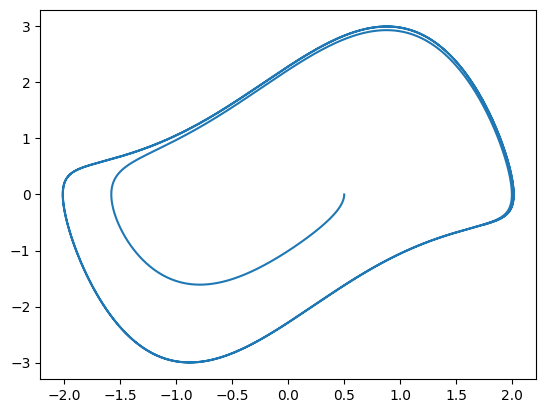

In [20]:
plt.plot(sol[:,0], sol[:,1]) # posición, velocidad

Integrar usando Multon de 3 orden y Adams-Bashforth de 2 puntos

In [32]:
def IntegratorAdams(f,r0,t,mu):
    h = t[1] - t[0]
    
    x = np.zeros_like(t)
    vx = np.zeros_like(t)    
    
    x[0] = r0[0]
    vx[0] = r0[1]
    
    K11 = np.zeros(2)
    K12 = np.zeros(2)
    
    # Las pendientes instantaneas
    present = np.array([x[0],vx[0]])
    
    K11 = f(present, t[0], mu)
    
    # se hace Euler
    x[1] = x[0] + h*K11[0]
    vx[1] = vx[0] + h*K11[1]
    
    R = np.zeros(2)
    
    xc = x.copy()
    
    for i in range(1,len(t)):
            
        R = np.array([x[i-1], vx[i-1]])
        
        # print('valor instantaneo', R)
        
        K1 = f(R, t[i-1])
        
        R = np.array([x[i-1]+h*K1[0], vx[i-1]+h*K1[1]])
        
        K2 = f(R,t[i-1]+h)
        
        
        x[i] = x[i-1] + 0.5*h*(3*K1[0] - K2[0])
        
        vx[i] = vx[i-1] + 0.5*h*(3*K1[1] - K2[1])
        
        
        xc[i] = x[i-1] + 0.5*h*(K1[0] + K2[0])
        
        
        # print('x', x[i], 'vx', vx[i])
        
    return x,vx

In [33]:
x, vx = IntegratorAdams(System,r0,t, mu=1.5)

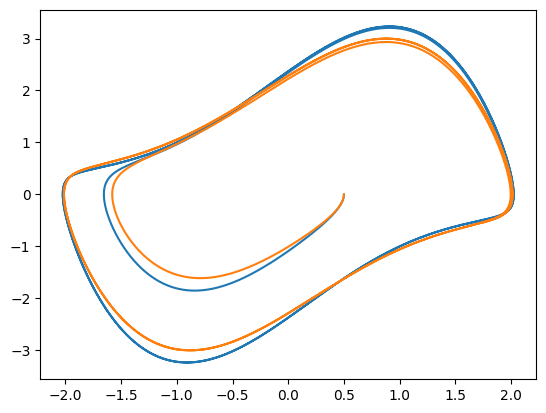

In [35]:
plt.plot(x, vx)
plt.plot(sol[:,0], sol[:,1]) # posición, velocidad